# Validaciones - Clasificadores

#### Tablas 2010 - Personas - Total Pais

- Poblacion por CONDACT
- Poblacion por CAT OCUP
- Poblacion por CAT INAC

#### Tablas 2010 - Personas - En Aglomerados

- Poblacion por CONDACT
- Poblacion por CAT OCUP
- Poblacion por CAT INAC

#### Tablas 2010 - Personas - Total Pais

- Poblacion por CONDACT y AGLOMERADO 
    - ***Comparacion INDEC***
- Poblacion por CAT OCUP y AGLOMERADO
- Poblacion por CAT INAC y AGLOMERADO

- Poblacion por CONDACT y PROV
    - ***Comparacion INDEC***
- Poblacion por CAT OCUP y PROV
    - ***Comparacion INDEC***
- Poblacion por CAT INAC y PROV

#### Serie de Tiempo - Personas - Total Pais

- Poblacion por CONDACT
- Poblacion por CAT OCUP
- Poblacion por CAT INAC

#### Tablas 2010 - Personas - Total Pais

- Poblacion por Ingreso
- Poblacion por Ingreso NLB
- Poblacion por Ingreso JUB
- Poblacion por Ingreso SBS

#### Tablas 2010 - Personas - En Aglomerados

- Poblacion por Ingreso
- Poblacion por Ingreso NLB
- Poblacion por Ingreso JUB
- Poblacion por Ingreso SBS

#### Tablas 2010 - Personas - Total Pais

- Poblacion por Ingreso y AGLOMERADO
- Poblacion por Ingreso JUB y AGLOMERADO
- Poblacion por Ingreso y PROV
- Poblacion por Ingreso JUB y PROV

#### Serie de Tiempo - Personas - Total Pais

- Poblacion por Ingreso
- Poblacion por Ingreso NLB
- Poblacion por Ingreso JUB
- Poblacion por Ingreso SBS


#### Tablas 2010 - Personas - Total Pais

- Poblacion por Informalidad (PP07K)

#### Tablas 2010 - Personas - En Aglomerados

- Poblacion por Informalidad (PP07K)

#### Serie de Tiempo - Personas - Total Pais

- Poblacion por Informalidad (PP07K)

In [ ]:
from oauth2client.service_account import ServiceAccountCredentials
import gspread
from numpy import array, nan

def load_spreadsheet(key, worksheet = 0):

    scope = ['https://spreadsheets.google.com/feeds',
             'https://www.googleapis.com/auth/drive']

    credentials = ServiceAccountCredentials.from_json_keyfile_name(
             'fourth-stock-325317-605e9494d4f6.json', scope) # Your json file here

    gc = gspread.authorize(credentials)

    wks = gc.open_by_key(key).get_worksheet(worksheet)

    data = array(wks.get_all_values())

#     # 1 line header
# #     header_0 = pd.Series(data[0, 1:]).replace('', nan).fillna(method = 'pad').values
    
#     # 2 lines header
#     header_0 = pd.Series(data[0, 2:]).replace('', nan).fillna(method = 'pad').values
#     header_1 = array(data[1, 2:])
#     header = pd.MultiIndex.from_arrays([header_0, header_1]) #zip(header_0, header_1)
    
#     index_0 = pd.Series(data[1:, 0]).replace('', nan).fillna(method = 'pad').values
    
#     sheet = pd.DataFrame(data[1:, 1:], columns=header_0, index = index_0)

    return data


In [178]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from IPython.display import display, Markdown, Latex

import glob
frac = 0.01
# path ='./data/RFReg_' # use your path
path ='./../data/Pobreza/pobreza_' # use your path

allFiles = []
allFiles += glob.glob(path+str(frac)+'_q*.csv')
allFiles = sorted(allFiles)
allFiles

['./../data/Pobreza/pobreza_0.01_q2010-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2010-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2010-08-15.csv',
 './../data/Pobreza/pobreza_0.01_q2010-11-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-08-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-11-15.csv']

In [2]:
aglo_labels = pd.read_csv('./../data/info/aglo_labels.csv')

In [76]:
df_list = []
for f in allFiles:
    print(f)
    
    groupers = ['AGLOMERADO', 'PROV', 'NOMPROV']
    vars_ = ['CONDACT', 'CAT_OCUP', 'CAT_INAC']
    
    data = pd.read_csv(f, usecols = ['Q'] + groupers + vars_)
    data = data.merge(aglo_labels)
    data['AGLO_si'] = data.AGLOMERADO != 0
    data['Total'] = True
    
    sums = data.groupby(['Total', 'AGLO_si', 'NOMAGLO'] + groupers + ['Q'] + vars_).size()
    sums = sums/frac
    sums.name = 'Personas'
    out = sums.reset_index()

    df_list += [out]
    
df = pd.concat(df_list)
df['Q'] = pd.to_datetime(df['Q'])
df10 = df.loc[df.Q.dt.year == 2010]

./../data/Pobreza/pobreza_0.01_q2010-02-15.csv
./../data/Pobreza/pobreza_0.01_q2010-05-15.csv
./../data/Pobreza/pobreza_0.01_q2010-08-15.csv
./../data/Pobreza/pobreza_0.01_q2010-11-15.csv
./../data/Pobreza/pobreza_0.01_q2011-02-15.csv
./../data/Pobreza/pobreza_0.01_q2011-05-15.csv
./../data/Pobreza/pobreza_0.01_q2011-08-15.csv
./../data/Pobreza/pobreza_0.01_q2011-11-15.csv


## Cantidad Personas (2010) Por Condicion de ocupacion

### Total Pais

In [77]:
data = df10

for col in ['CONDACT', 'CAT_OCUP', 'CAT_INAC']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### CONDACT

,Cantidad,Porcentaje
CONDACT,,
0,9704400.0,24.3
1,18570675.0,46.4
2,1328225.0,3.3
3,10402100.0,26.0
TOTAL,40005400.0,100.0


### CAT_OCUP

,Cantidad,Porcentaje
CAT_OCUP,,
0,20126800.0,50.3
1,67200.0,0.2
2,1076525.0,2.7
3,18724225.0,46.8
4,10650.0,0.0
TOTAL,40005400.0,100.0


### CAT_INAC

,Cantidad,Porcentaje
CAT_INAC,,
0,20151000.0,50.4
1,3892900.0,9.7
2,2400.0,0.0
3,8371300.0,20.9
4,3055700.0,7.6
5,3990000.0,10.0
6,35800.0,0.1
7,506300.0,1.3
TOTAL,40005400.0,100.0


### 31 Aglomerados

In [78]:
data = df10.loc[data.AGLO_si == 1]

for col in ['CONDACT', 'CAT_OCUP', 'CAT_INAC']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### CONDACT

,Cantidad,Porcentaje
CONDACT,,
0,5778200.0,22.9
1,12391225.0,49.1
2,935975.0,3.7
3,6139400.0,24.3
TOTAL,25244800.0,100.0


### CAT_OCUP

,Cantidad,Porcentaje
CAT_OCUP,,
0,11939900.0,47.3
1,46575.0,0.2
2,616975.0,2.4
3,12636050.0,50.1
4,5300.0,0.0
TOTAL,25244800.0,100.0


### CAT_INAC

,Cantidad,Porcentaje
CAT_INAC,,
0,13465600.0,53.3
1,2378800.0,9.4
2,1200.0,0.0
3,5010400.0,19.8
4,1692500.0,6.7
5,2427900.0,9.6
6,17900.0,0.1
7,250500.0,1.0
TOTAL,25244800.0,99.9


## Cantidad de Personas, por Aglomerado

In [79]:
data = df10

for col in ['CONDACT', 'CAT_OCUP', 'CAT_INAC']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', 'NOMAGLO', col])['Personas'].sum().unstack([-2, -1]).mean()
#     tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
#     tabla.columns = ['Cantidad', 'Porcentaje']
    tabla = tabla.unstack()
    tabla.loc['TOTAL'] = tabla.sum();
    tabla = tabla.fillna(0)
    
    display(tabla)

### CONDACT

CONDACT,0,1,2,3
NOMAGLO,,,,
Bahia Blanca,62400.0,143075.0,10625.0,77600.0
CABA,466100.0,1644875.0,87425.0,669500.0
Catamarca,44400.0,84675.0,6825.0,39700.0
Cdro Rivadavia,39100.0,77625.0,5675.0,37600.0
Concordia,43900.0,66425.0,3575.0,36600.0
Cordoba,316100.0,713000.0,58300.0,360100.0
Corrientes,83600.0,155525.0,13175.0,87700.0
Formosa,56500.0,94625.0,6475.0,62800.0
Fuera de aglom.,3926200.0,6179450.0,392250.0,4262700.0


### CAT_OCUP

CAT_OCUP,0,1,2,3,4
NOMAGLO,,,,,
Bahia Blanca,140750.0,1075.0,7350.0,144525.0,0.0
CABA,1135075.0,8425.0,76625.0,1647675.0,100.0
Catamarca,84400.0,100.0,4025.0,86775.0,300.0
Cdro Rivadavia,77025.0,200.0,2400.0,80375.0,0.0
Concordia,80700.0,100.0,3600.0,66100.0,0.0
Cordoba,677975.0,1900.0,33900.0,733725.0,0.0
Corrientes,172000.0,675.0,8450.0,158675.0,200.0
Formosa,119375.0,100.0,4000.0,96925.0,0.0
Fuera de aglom.,8186900.0,20625.0,459550.0,6088175.0,5350.0


### CAT_INAC

CAT_INAC,0,1,2,3,4,5,6,7
NOMAGLO,,,,,,,,
Bahia Blanca,155200.0,33100.0,0.0,62000.0,17700.0,23800.0,100.0,1800.0
CABA,1752400.0,361700.0,200.0,416900.0,121100.0,197800.0,800.0,17000.0
Catamarca,91500.0,12300.0,100.0,41600.0,10200.0,17700.0,0.0,2200.0
Cdro Rivadavia,83400.0,11000.0,0.0,30900.0,13700.0,19200.0,0.0,1800.0
Concordia,70000.0,13800.0,0.0,34000.0,10700.0,19800.0,100.0,2100.0
Cordoba,777200.0,142000.0,0.0,289500.0,91000.0,132800.0,1000.0,14000.0
Corrientes,169300.0,24700.0,0.0,80300.0,25800.0,33200.0,500.0,6200.0
Formosa,101400.0,14700.0,0.0,58900.0,19600.0,21600.0,100.0,4100.0
Fuera de aglom.,6685400.0,1514100.0,1200.0,3360900.0,1363200.0,1562100.0,17900.0,255800.0


### Personas por CONDACT y AGLOMERADO. Comparacion INDEC

In [63]:
datos = load_spreadsheet('1ZxNStcxYaJoUZfM4hEIHbonRiTbFzJM2qLkS4RKFntM', worksheet=2)

df = pd.DataFrame(datos)
## Set index
df = df.set_index([0, 1, 2, 3])

## Set header
df, df.columns = df[2:] , df.iloc[1]
df.columns.name = 'CONDACT'

df.index.names = ['AGLO_ID', 'AGLOMERADO','NOMAGLO','Q']
df = df.astype(int)
df.head()

# ### Data MI
# data = df10; col = 'CONDACT'
# tabla = data.groupby(['Q', 'PROV', 'NOMPROV', col])['Personas'].sum().unstack([-3, -2, -1]).mean()
# tabla = tabla.unstack()
# tabla = tabla.fillna(0)
# tabla.index = tabla.index.set_levels(tabla.index.levels[0].astype(str), level=0)

,,,CONDACT,Entrevista no Realizada,Ocupado,Desocupado,Inactivo,Menor de 14,Total
AGLO_ID,AGLOMERADO,NOMAGLO,Q,,,,,,
u'0005',2,La Plata,2010-02-15,430,298828,30481,312338,100293,742370
u'0014',3,Bahia Blanca,2010-02-15,0,131164,13401,123409,41290,309264
u'0003',4,Rosario,2010-02-15,0,540747,65561,488060,164029,1258397
u'0008',5,Santa Fe,2010-02-15,319,206860,22053,198168,76727,504127
u'0016',6,Parana,2010-02-15,753,110027,7854,110906,45810,275350


In [306]:
# info = pd.concat([df.sum(), tabla.sum()], axis = 1).dropna()#.sum()

# fig, axs = plt.subplots(1, figsize = (5, 4))

# info.plot(x = 0, y = 1, marker = 'o', lw = 0, ax = axs)

# plt.plot([1e6, 2.5e7], [1e6, 2.5e7], lw = 1, linestyle = '--', c = '.5')
# axs.set_xscale('log'); axs.set_yscale('log'); 
# axs.set_xlabel('INDEC'); axs.set_ylabel('MI'); 
# plt.show()


In [307]:
# info = pd.concat([df[1], tabla[1]], axis = 1).dropna()#.sum()
# info.columns = ['INDEC', 'MI']
# fig, axs = plt.subplots(1, figsize = (5, 4))

# info.plot(x = 'INDEC', y = 'MI', marker = 'o', lw = 0, ax = axs)

# plt.plot([1e5, 1e7], [1e5, 1e7], lw = 1, linestyle = '--', c = '.5')
# axs.set_xscale('log'); axs.set_yscale('log'); 
# axs.set_xlabel('INDEC'); axs.set_ylabel('MI'); 
# plt.show()


## Cantidad de Personas, por Provincia

In [95]:
data = df10

for col in ['CONDACT', 'CAT_OCUP', 'CAT_INAC']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', 'PROV', 'NOMPROV', col])['Personas'].sum().unstack([-3, -2, -1]).mean()
#     tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
#     tabla.columns = ['Cantidad', 'Porcentaje']
    tabla = tabla.unstack()
#     tabla.at[(99, 'TOTAL')] = tabla.sum();
    tabla = tabla.fillna(0)
    
    display(tabla)

### CONDACT

,CONDACT,0,1,2,3
PROV,NOMPROV,,,,
2,Ciudad Autónoma de Buenos Aires,466100.0,1645575.0,87625.0,669600.0
6,Buenos Aires,3684600.0,7580350.0,550450.0,3800900.0
10,Catamarca,106900.0,155475.0,13325.0,97200.0
14,Córdoba,754900.0,1544975.0,104125.0,881500.0
18,Corrientes,264500.0,385400.0,24900.0,307000.0
22,Chaco,302700.0,410850.0,26350.0,309000.0
26,Chubut,128500.0,246075.0,16825.0,113300.0
30,Entre Ríos,313300.0,545300.0,28700.0,348400.0
34,Formosa,161900.0,199275.0,11925.0,161800.0


### CAT_OCUP

,CAT_OCUP,0,1,2,3,4
PROV,NOMPROV,,,,,
2,Ciudad Autónoma de Buenos Aires,1135175.0,8425.0,76625.0,1648575.0,100.0
6,Buenos Aires,7499750.0,30650.0,438175.0,7645200.0,2525.0
10,Catamarca,202900.0,200.0,9500.0,160000.0,300.0
14,Córdoba,1637325.0,5000.0,91125.0,1551675.0,375.0
18,Corrientes,573075.0,1750.0,25350.0,381125.0,500.0
22,Chaco,612500.0,900.0,32575.0,402125.0,800.0
26,Chubut,239325.0,500.0,11400.0,253475.0,0.0
30,Entre Ríos,662300.0,1600.0,34575.0,537025.0,200.0
34,Formosa,324075.0,125.0,15900.0,194400.0,400.0


### CAT_INAC

,CAT_INAC,0,1,2,3,4,5,6,7
PROV,NOMPROV,,,,,,,,
2,Ciudad Autónoma de Buenos Aires,1753300.0,361700.0,200.0,417000.0,121100.0,197800.0,800.0,17000.0
6,Buenos Aires,8221800.0,1511500.0,1100.0,3077100.0,1103900.0,1547500.0,11600.0,141800.0
10,Catamarca,177800.0,28700.0,100.0,96300.0,26600.0,36600.0,200.0,6600.0
14,Córdoba,1669100.0,360200.0,100.0,668300.0,241100.0,308600.0,3000.0,35100.0
18,Corrientes,411000.0,95300.0,100.0,239700.0,102600.0,109100.0,1600.0,22400.0
22,Chaco,440200.0,82700.0,100.0,277000.0,109300.0,113300.0,1300.0,25000.0
26,Chubut,269700.0,37000.0,0.0,104200.0,35200.0,54200.0,300.0,4100.0
30,Entre Ríos,576700.0,134300.0,0.0,271100.0,106800.0,126800.0,1000.0,19000.0
34,Formosa,211500.0,40900.0,0.0,150300.0,55500.0,62100.0,600.0,14000.0


### Personas por CAT OCUP y PROVINCIA. Comparacion INDEC

In [295]:
### Data INDEC

datos = load_spreadsheet('1ZxNStcxYaJoUZfM4hEIHbonRiTbFzJM2qLkS4RKFntM', worksheet=0)

df = pd.DataFrame(datos)
## Set index
df = df.set_index([0, 1])

## Set header
df, df.columns = df[2:] , df.iloc[0].astype(int)
df.columns.name = 'CAT_OCUP'

df.index.names = ['PROV', 'NOMPROV']

df = df.astype(int)


### Data MI
data = df10; col = 'CAT_OCUP'
tabla = data.groupby(['Q', 'PROV', 'NOMPROV', col])['Personas'].sum().unstack([-3, -2, -1]).mean()
tabla = tabla.unstack()
tabla = tabla.fillna(0)
tabla.index = tabla.index.set_levels(tabla.index.levels[0].astype(str), level=0)

In [296]:
import numpy as np

,INDEC,MI
CAT_OCUP,,
3,12833173,18724225.0
1,1228011,67200.0
2,3437630,1076525.0
4,577932,10675.0
0,22035352,20126800.0


INDEC    40112098.0
MI       40005425.0
dtype: float64

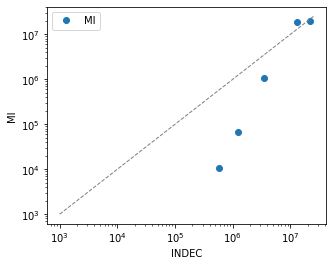

In [305]:
info = pd.concat([df.sum(), tabla.sum()], axis = 1).dropna()#.sum()
info.columns = ['INDEC', 'MI']

display(info)

display(info.sum())

fig, axs = plt.subplots(1, figsize = (5, 4))

info.plot(x = 0, y = 1, marker = 'o', lw = 0, ax = axs)

plt.plot([1e3, 2.5e7], [1e3, 2.5e7], lw = 1, linestyle = '--', c = '.5')
axs.set_xscale('log'); axs.set_yscale('log'); 
axs.set_xlabel('INDEC'); axs.set_ylabel('MI'); 
plt.show()


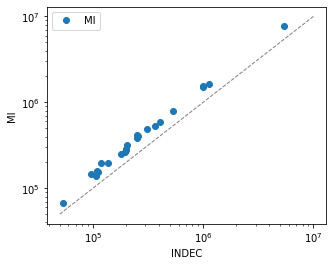

In [302]:
info = pd.concat([df[3], tabla[3]], axis = 1).dropna()#.sum()
info.columns = ['INDEC', 'MI']
fig, axs = plt.subplots(1, figsize = (5, 4))

info.plot(x = 'INDEC', y = 'MI', marker = 'o', lw = 0, ax = axs)

plt.plot([5e4, 1e7], [5e4, 1e7], lw = 1, linestyle = '--', c = '.5')
axs.set_xscale('log'); axs.set_yscale('log'); 
axs.set_xlabel('INDEC'); axs.set_ylabel('MI'); 
plt.show()


### Personas por CONDACT y PROVINCIA. Comparacion INDEC

In [282]:
datos = load_spreadsheet('1ZxNStcxYaJoUZfM4hEIHbonRiTbFzJM2qLkS4RKFntM', worksheet=1)

df = pd.DataFrame(datos)
## Set index
df = df.set_index([0, 1])

## Set header
df, df.columns = df[2:] , df.iloc[0].astype(int)
df.columns.name = 'CONDACT'

df.index.names = ['PROV', 'NOMPROV']
df = df.astype(int)

### Data MI
data = df10; col = 'CONDACT'
tabla = data.groupby(['Q', 'PROV', 'NOMPROV', col])['Personas'].sum().unstack([-3, -2, -1]).mean()
tabla = tabla.unstack()
tabla = tabla.fillna(0)
tabla.index = tabla.index.set_levels(tabla.index.levels[0].astype(str), level=0)

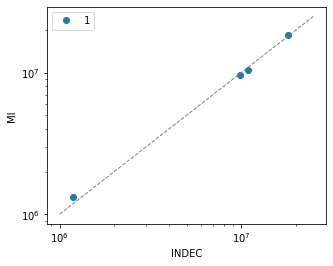

In [283]:
info = pd.concat([df.sum(), tabla.sum()], axis = 1).dropna()#.sum()

fig, axs = plt.subplots(1, figsize = (5, 4))

info.plot(x = 0, y = 1, marker = 'o', lw = 0, ax = axs)

plt.plot([1e6, 2.5e7], [1e6, 2.5e7], lw = 1, linestyle = '--', c = '.5')
axs.set_xscale('log'); axs.set_yscale('log'); 
axs.set_xlabel('INDEC'); axs.set_ylabel('MI'); 
plt.show()


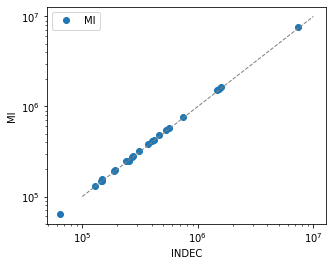

In [292]:
info = pd.concat([df[1], tabla[1]], axis = 1).dropna()#.sum()
info.columns = ['INDEC', 'MI']
fig, axs = plt.subplots(1, figsize = (5, 4))

info.plot(x = 'INDEC', y = 'MI', marker = 'o', lw = 0, ax = axs)

plt.plot([1e5, 1e7], [1e5, 1e7], lw = 1, linestyle = '--', c = '.5')
axs.set_xscale('log'); axs.set_yscale('log'); 
axs.set_xlabel('INDEC'); axs.set_ylabel('MI'); 
plt.show()


## Cantidad Personas, Series de Tiempo

In [ ]:
for col in ['CONDACT', 'CAT_OCUP', 'CAT_INAC']:
    display(Markdown('### '+col))

    fig, axs = plt.subplots(1, figsize = (6, 5))

    table = df.groupby(['Q', col])['Personas'].sum().unstack()
    table = table/1e6

    table.plot(ax = axs, marker = '.')
    axs.grid(linestyle = '--')
    axs.set_xlim('2003', '2022')
    axs.set_ylim(0, )
    axs.set_xlabel('Trimestre')
    axs.set_ylabel('Cant. Personas (mill.)')
    plt.show()

## Cantidad Personas (2010) Por INGRESO SI/NO

### Total Pais

In [ ]:
df_list = []
for f in allFiles:
    print(f)
    groupers = ['AGLOMERADO', 'NOMPROV']
    vars_ = ['INGRESO', 'INGRESO_NLB', 'INGRESO_JUB', 'INGRESO_SBS']
    
    data = pd.read_csv(f, usecols = ['Q'] + groupers + vars_)
    data = data.merge(aglo_labels)
    data['AGLO_si'] = data.AGLOMERADO != 0
    data['Total'] = True
    
    sums = data.groupby(['Total', 'AGLO_si', 'NOMAGLO'] + groupers + ['Q'] + vars_).size()
    sums = sums/frac
    sums.name = 'Personas'
    out = sums.reset_index()

    df_list += [out]
    
    
    
df = pd.concat(df_list)
df['Q'] = pd.to_datetime(df['Q'])
df10 = df.loc[df.Q.dt.year == 2010]

In [ ]:
data = df10

for col in ['INGRESO', 'INGRESO_NLB', 'INGRESO_JUB', 'INGRESO_SBS']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### 31 Aglomerados

In [ ]:
data = df10.loc[data.AGLO_si == 1]

for col in ['INGRESO', 'INGRESO_NLB', 'INGRESO_JUB', 'INGRESO_SBS']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

## Cantidad de Personas, por Aglomerado

In [ ]:
data = df10

for col in ['INGRESO', 'INGRESO_JUB']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', 'NOMAGLO', col])['Personas'].sum().unstack([-2, -1]).mean()
#     tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
#     tabla.columns = ['Cantidad', 'Porcentaje']
    tabla = tabla.unstack()
    tabla.loc['TOTAL'] = tabla.sum();
    tabla = tabla.fillna(0)
    
    display(tabla)

## Cantidad de Personas, por Provincia

In [ ]:
data = df10

for col in ['INGRESO', 'INGRESO_JUB']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', 'NOMPROV', col])['Personas'].sum().unstack([-2, -1]).mean()
#     tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
#     tabla.columns = ['Cantidad', 'Porcentaje']
    tabla = tabla.unstack()
    tabla.loc['TOTAL'] = tabla.sum();
    tabla = tabla.fillna(0)
    
    display(tabla)

## Cantidad Personas, Series de Tiempo

In [ ]:
for col in ['INGRESO', 'INGRESO_NLB', 'INGRESO_JUB', 'INGRESO_SBS']:
    display(Markdown('### '+col))

    fig, axs = plt.subplots(1, figsize = (6, 5))

    table = df.groupby(['Q', col])['Personas'].sum().unstack()
    table = table/1e6

    table.plot(ax = axs, marker = '.')
    axs.grid(linestyle = '--')
    axs.set_xlim('2003', '2022')
    axs.set_ylim(0, )
    axs.set_xlabel('Trimestre')
    axs.set_ylabel('Cant. Personas (mill.)')
    plt.show()

## Cantidad Personas (2010) Por Formalidad Laboral

### Total Pais

In [ ]:
df_list = []
for f in allFiles:
    print(f)
    
    groupers = ['AGLOMERADO']
    vars_ = ['PP07K']
    
    data = pd.read_csv(f, usecols = ['Q'] + groupers + vars_)
    data['AGLO_si'] = data.AGLOMERADO != 0
    data['Total'] = True
    
    sums = data.groupby(['Total', 'AGLO_si', 'AGLOMERADO'] + ['Q'] + vars_).size()
    sums = sums/frac
    sums.name = 'Personas'
    out = sums.reset_index()

    df_list += [out]
    
df = pd.concat(df_list)
df['Q'] = pd.to_datetime(df['Q'])
df10 = df.loc[df.Q.dt.year == 2010]

In [ ]:
data = df10

for col in ['PP07K']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### 31 Aglomerados

In [ ]:
data = df10.loc[data.AGLO_si == 1]

for col in ['PP07K']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

## Cantidad Personas, Series de Tiempo

In [ ]:
for col in ['PP07K']:
    display(Markdown('### '+col))

    fig, axs = plt.subplots(1, figsize = (6, 5))

    table = df.groupby(['Q', col])['Personas'].sum().unstack()
    table = table/1e6

    table.plot(ax = axs, marker = '.')
    axs.grid(linestyle = '--')
    axs.set_xlim('2003', '2022')
    axs.set_ylim(0, )
    axs.set_xlabel('Trimestre')
    axs.set_ylabel('Cant. Personas (mill.)')
    plt.show()